# Logistic Regression

## Example 1: Customer Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/facebook_ads.csv', encoding='ISO-8859-1')
df.head(n=3)

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0


In [3]:
df.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


In [4]:
print('Clicked = {}'.format(sum(df.Clicked == 1)))
print('No Click = {}'.format(sum(df.Clicked == 0)))

Clicked = 250
No Click = 249


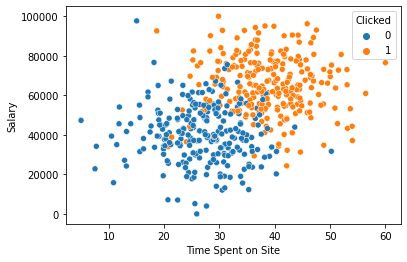

In [5]:
sns.scatterplot(x='Time Spent on Site', y='Salary', hue='Clicked', data=df);

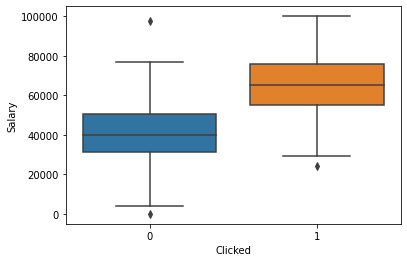

In [6]:
sns.boxplot(x='Clicked', y='Salary', data=df);

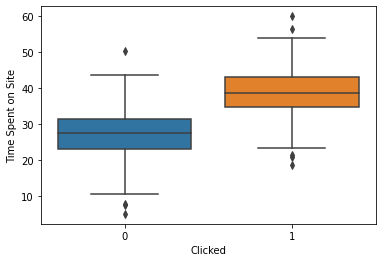

In [7]:
sns.boxplot(x='Clicked', y='Time Spent on Site', data=df);

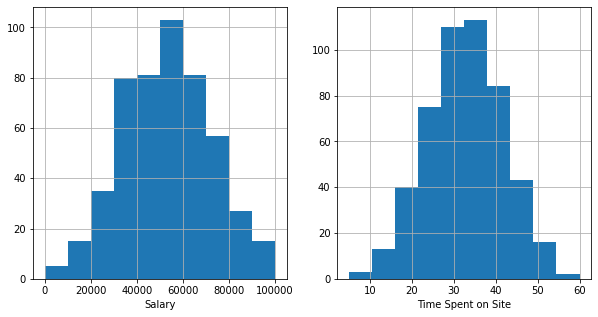

In [8]:
plt.figure(figsize=(10,5))

plt.subplot(121)
df['Salary'].hist();
plt.xlabel('Salary');

plt.subplot(122)
df['Time Spent on Site'].hist();
plt.xlabel('Time Spent on Site');

In [9]:
df.drop(['Names', 'emails', 'Country'], axis=1, inplace=True)
df.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


In [10]:
from sklearn.model_selection import train_test_split

X = df[['Time Spent on Site', 'Salary']]
y = df['Clicked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train_scaled, y_train)

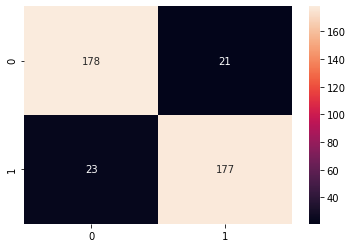

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_train, lr.predict(X_train_scaled))
sns.heatmap(cm, annot=True, fmt='d');

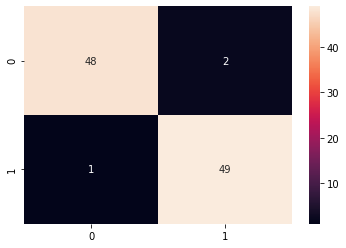

In [14]:
cm = confusion_matrix(y_test, lr.predict(X_test_scaled))
sns.heatmap(cm, annot=True, fmt='d');

In [15]:
print(classification_report(y_test, lr.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.96      0.98      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [16]:
from matplotlib.colors import ListedColormap

In [17]:
xs, ys = X_train_scaled, y_train
X1, X2 = np.meshgrid(np.linspace(xs[:,0].min() - 1, xs[:,0].max() + 1, 1000),
                     np.linspace(xs[:,1].min() - 1, xs[:,1].max() + 1, 1000))

features = np.array([X1.ravel(), X2.ravel()]).T

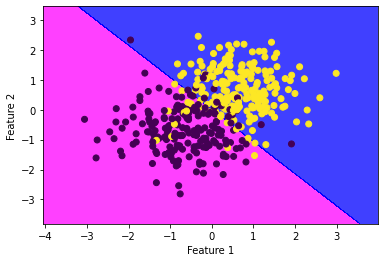

In [18]:
predictions = lr.predict(features).reshape(X1.shape)
plt.contourf(X1, X2, predictions, alpha=0.75, cmap=ListedColormap(('magenta', 'blue')));
plt.scatter(xs[:,0], xs[:,1], c=ys);
plt.xlabel('Feature 1');
plt.ylabel('Feature 2');

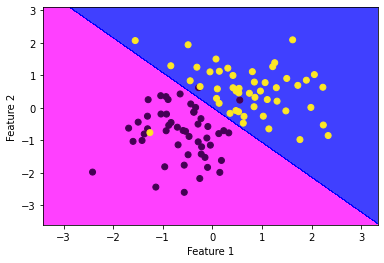

In [19]:
xs, ys = X_test_scaled, y_test
X1, X2 = np.meshgrid(np.linspace(xs[:,0].min() - 1, xs[:,0].max() + 1, 1000),
                     np.linspace(xs[:,1].min() - 1, xs[:,1].max() + 1, 1000))

features = np.array([X1.ravel(), X2.ravel()]).T
predictions = lr.predict(features).reshape(X1.shape)

plt.contourf(X1, X2, predictions, alpha=0.75, cmap=ListedColormap(('magenta', 'blue')));
plt.scatter(xs[:,0], xs[:,1], c=ys);
plt.xlabel('Feature 1');
plt.ylabel('Feature 2');